In [8]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

In [9]:
img = cv2.imread("9.1 star.png (1).png")

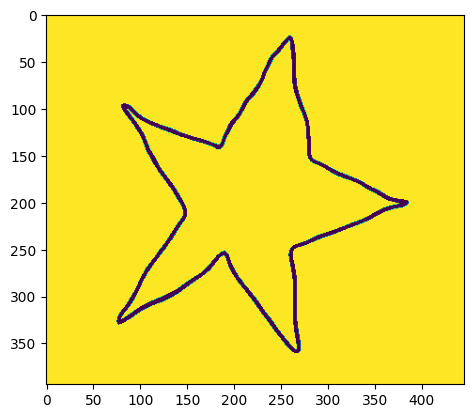

In [10]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
_ , thresh = cv2.threshold(gray,127,255,0)
plt.imshow(thresh)

In [11]:
contours ,_ = cv2.findContours(thresh,2,1 )
hull = []
hull = cv2.convexHull(contours[0] , True)

In [12]:
defects = cv2.convexityDefects(contours[0] , hull)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\convhull.cpp:329: error: (-215:Assertion failed) hpoints > 0 in function 'cv::convexityDefects'


In [13]:
for i in range(defect.shape[0]):
    s,e,f,d = defect[i,0]
    
    start = tuple(contours[s][0])
    end = tuple(contours[s][0])
    far = tuple(contours[s][0])

    cv2.line(img,start,end,[0,255,0] , 2)
    cv2.circle(img,far ,5,(0,255,0),-1)

NameError: name 'defect' is not defined